# Calculating similar books based on reviews

In [3]:
import pickle
import pandas as pd


with open('/content/drive/MyDrive/GoodReadsClean/IntermediateData/ReviewVars/review_tf_idf.pkl', 'rb') as handle:
    tidf = pickle.load(handle)

with open('/content/drive/MyDrive/GoodReadsClean/IntermediateData/ReviewVars/review_map_workID_index.pkl', 'rb') as handle:
    rev_bks = pickle.load(handle)

bk_data = pd.read_pickle("/content/drive/MyDrive/GoodReadsClean/IntermediateData/BooksVars/book_metadata.pkl")

In [4]:
bk_data.loc[bk_data.work_id == "", "work_id"] = bk_data[bk_data.work_id == ""].book_id
df = bk_data
id_title = dict(zip(df.work_id, df.title))

In [5]:
work_book_map = {}
book_work_map = {}
for x,y in zip(df.work_id, df.book_id):
  if x not in work_book_map.keys():
    work_book_map[x] = []
  work_book_map[x].append(y)
  if y not in book_work_map.keys():
    book_work_map[y] = []
  book_work_map[y].append(x)


In [5]:
import pickle
def save_object(obj, filename):
    with open(filename, 'wb') as output:  # Overwrites any existing file.
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)
  
#save_object(book_work_map, "/content/drive/MyDrive/GoodReadsClean/IntermediateData/OtherVars/book_work_map.pkl")

In [ ]:
rev_rev_bks = {cnt:val for cnt, val in enumerate(rev_bks)}

In [ ]:
bk_data[bk_data.title.str.lower().str.contains("mistborn")]

,work_id,title,book_id,avgRating,sims,ratings_count
8601,2120474,"The Well of Ascension (Mistborn, Book 2)",12515780,4.35,"[12499290, 17608111, 12174312, 13891, 6316821,...",64
21353,66322,"Mistborn: The Final Empire (Mistborn, #1)",2705034,4.43,"[2903736, 10790277, 1166599, 6065889, 3754026,...",346
34555,66322,"Mistborn: The Final Empire (Mistborn, #1)",6656935,4.43,"[2903736, 10790277, 1166599, 6065889, 3754026,...",329
57130,66322,Mistborn. L'ultimo impero,19140285,4.43,"[2903736, 10790277, 1166599, 6065889, 3754026,...",12
82058,15035863,"De wet van staal (Mistborn, #4)",23198178,4.20,"[8697584, 20614529, 9268487, 12652457, 7743175...",14
...,...,...,...,...,...,...
2279065,15035863,"The Alloy of Law (Mistborn, #4)",32858015,4.20,"[8697584, 20614529, 9268487, 12652457, 7743175...",13
2286456,2120474,Pramen povýšení (Mistborn #2),16068620,4.35,"[12499290, 17608111, 12174312, 13891, 6316821,...",63
2327850,21855448,"Shadows of Self (Mistborn, #5)",27019562,4.30,"[20883847, 24683898, 20404905, 22756712, 20753...",149
2335986,66322,Mistborn : Nascidos da Bruma: o império final,24479436,4.43,"[2903736, 10790277, 1166599, 6065889, 3754026,...",25


In [11]:
import numpy as np
from sklearn.metrics.pairwise import linear_kernel
def reccomendReview(id, n, verbose = False):
  sparseIndex = rev_bks[id]
  cosine_similarities = linear_kernel(tidf[sparseIndex],tidf)
  closest = np.argsort(cosine_similarities[0])[-(n+1):-1]
  closest_ids = [rev_rev_bks[x] for x in closest]
  if verbose:
    print("Books Closest to:", id_title[str(id)])
    for x in closest_ids[::-1]:
      print(id_title[str(x)])
  return closest_ids[::-1]

In [ ]:
%%time
ids = reccomendReview(1180409, 50, True)

Books Closest to: Estudos Sobre Veneno (As Lendas de Yelena Zaltana #1)
Black Soul: L'ombra della magia (Soulfinders, #1)
Magin (Study, #2)
Dawn Study (Soulfinders, #3)
Night Study (Soulfinders, #2)
Fire Study (Study, #3)
The Poison Study Short Story Collection: Assassin Study, Power Study, Ice Study (Study #1.5, #3.5, #3.6)
Assassin Study (Study, #1.5)
Ice Study (Study, #3.6)
The Study Series Bundle (Study, #1-3)
Letters From Yelena
Storm Glass (Glass, #1)
Soul to Soul: A Black Russian American Family, 1865-1992
Of Blood and Magic
Interview with Valek
In The Crossfire
The Vampire's Daughter (Of Light and Darkness, #1)
An Anthology of Contemporary Russian Women Poets
Sea Glass (Glass, #2)
Black Widow: The Itsy-Bitsy Spider
The Vampire's Hourglass
Glass Series Collection: Storm Glass / Sea Glass / Spy Glass
BELLATRIX (Frank Kurns Stories of the UnknownWorld, #3)
The Dead City Blues
Power Study (Study, #3.5)
Transmetropolitan #20
Shattered Glass (Glass, #3.5)
Black Widow: The Things They

This takes way too long. 45 seconds per prediction is far too much time. We have 2 options: dimensionality reduction or clustering. Then we can search for cosine similar within clusters. We try both

## Dimensionality reduction

In [ ]:
%%time
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(300)
ans = svd.fit_transform(tidf[:])

CPU times: user 47min 28s, sys: 3min, total: 50min 29s
Wall time: 36min 14s


In [ ]:
print(svd.explained_variance_ratio_.sum())


0.1636637891455356


Try out a rec!

In [ ]:
def reccomendReview2(id, n, verbose = False):
  sparseIndex = rev_bks[id]
  cosine_similarities = linear_kernel([ans[sparseIndex]],ans)
  closest = np.argsort(cosine_similarities[0])[-(n+1):-1]
  closest_ids = [rev_rev_bks[x] for x in closest]
  if verbose:
    print("Books Closest to:", id_title[str(id)])
    for x in closest_ids[::-1]:
      print(id_title[str(x)])
  return closest_ids[::-1]

In [ ]:
%%time
ids = reccomendReview2(14245059, 50, True)

Books Closest to: The Night Circus
نفر من الجن
كل هذا الهراء
في غرفة العنكبوت
عربة الياسمين
Unprotected: A Campus Psychiatrist Reveals How Political Correctness in Her Profession Endangers Every Student
قوم لا يتطهرون
تحرير المرأة في عصر الرسالة
الجسد والروح
سيزيرين
يا صاحبي السجن
Kafka on the Shore
منيجيل
عشيق المترجم
تاريخ ضائع: التراث الخالد لعلماء الإسلام ومفكريه وفنانيه
حياة في الإدارة
نظام الحكومة النبوية المسمى التراتيب الإدراية
ذئاب يلوستون
وطن الراشدين
A History of Reading
زوج حذاء لعائشة
البوصلة القرآنية
العبيد الجدد
ذكريات ضالة
HWJN
التفكير المستقيم والتفكير الأعوج
خرافة التقدم والتخلف: العرب والحضارة الغربية في مستهل القرن الواحد والعشرين
Superman est arabe
أقوم قيلا
La hora veinticinco
Even Angels Ask: A Journey to Islam in America
آذان الأنعام
أنا
خلاصة اليومية والشذور
اللغز وراء السطور
الله والإنسان
تاريخ شكل تاني
الضوء الأزرق
صندوق الدمى
رسالة في الطريق إلى ثقافتنا
رحلة إلى مكة
الإسلام وأصول الحكم: بحث في الخلافة والحكومة في الإسلام
ألواح و دسر
أوراق شخصية : حملة تفتيش


Much faster, but completely different recs. Which ones to trust?

In [ ]:
ans.shape

(1254826, 300)

## Clustering - We try on reduced dims to avoid prohibitively long convergence times

In [ ]:
from sklearn.cluster import MiniBatchKMeans
dists = []

cluster_cands = list(range(2,30))
for k in cluster_cands:
    clf = MiniBatchKMeans(n_clusters = k, batch_size = 1000, verbose = 0, max_iter = 1)
    clf.fit(ans[:])
    print(k,clf.inertia_)
    dists.append(clf.inertia_)

2 199993.0044200554
3 188189.16671205184
4 186182.95297116655
5 185347.702115267
6 180866.8344054295
7 182504.5368033533
8 178254.25770281488
9 182050.872742293
10 178650.67818329023
11 174380.86314766438
12 171628.1756408941
13 172003.16514618666
14 169014.61524061608
15 168809.65091922
16 163483.34546893308
17 165211.67214702512
18 167552.2838182156
19 164654.50613083295
20 160490.5553484882
21 163798.41054924543
22 163489.35470107052
23 162696.49078913388
24 159679.05921012422
25 158173.0637624726
26 160127.97257462368
27 161453.32522310724
28 156443.90362046618
29 155846.79865506658


Text(0.5, 0, '# of Clusters')

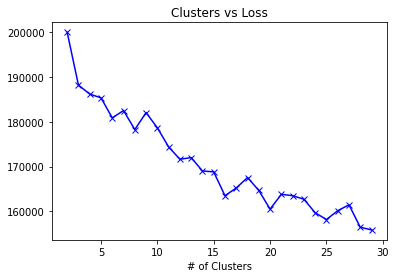

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(cluster_cands,dists, 'xb-')
plt.title("Clusters vs Loss")
plt.xlabel("# of Clusters")



# Tag-based filtering

In [6]:
with open('/content/drive/MyDrive/GoodReadsClean/IntermediateData/BooksVars/book_tags_tfidf.pkl', 'rb') as handle:
    tag_tidf = pickle.load(handle)

In [7]:
with open('/content/drive/MyDrive/GoodReadsClean/IntermediateData/BooksVars/book_map_workid_index.pkl', 'rb') as handle:
    bk_map = pickle.load(handle)

In [8]:
rev_bk_map = {v:k for k,v in bk_map.items()}

In [9]:
def reccomendGeneral(id, n, tidf, rev_bks, rev_rev_bks, verbose = False):
  sparseIndex = rev_bks[str(id)]
  cosine_similarities = linear_kernel(tidf[sparseIndex],tidf)
  closest = np.argsort(cosine_similarities[0])[-(n+1):-1]
  closest_ids = [rev_rev_bks[x] for x in closest]
  if verbose:
    print("Books Closest to:", id_title[str(id)])
    for x in closest_ids[::-1]:
      print(id_title[str(x)])
  return closest_ids[::-1]

In [12]:

%%time 
ids = reccomendGeneral(1180409, 50,tag_tidf, bk_map, rev_bk_map, True)

Books Closest to: Estudos Sobre Veneno (As Lendas de Yelena Zaltana #1)
Stadt der Diebe
Flora's Fury (Flora Trilogy, #3)
Rebel. El Desert en Flames
La corsa delle onde
Schim en Schaduw (De Grisha, #1)
Flora Segunda (Flora Trilogy, #1)
Magic's Child
Jackaroo (Kingdom, #1)
Sacred Scars (A Resurrection of Magic, Book 2)
Owl in Love
Finnikin de la roca (Crónicas de Lumatere, #1)
Queen of Attolia
Rebel Angels (Gemma Doyle, #2)
The Fire Wish (The Jinni Wars, #1)
The Darkangel (Darkangel Trilogy, #1)
Fire Arrow (The Songs of Eirren, #2)
Law of the Wolf Tower
The Tenth Power (Chanters of Tremaris, #3)
The Rose Society (The Young Elites, #2)
De plumes et de feu (The Girl at Midnight, #1)
Magic or Madness - Rahasia Sihir
Gateway
The Sweet Far Thing (Gemma Doyle, #3)
Defy (Defy, #1)
Schattendiebin 1: Die verborgene Gabe
The Song of the Quarkbeast (The Chronicles of Kazam, #2)
The Looking Glass Wars (The Looking Glass Wars, #1)
How to Ditch Your Fairy
Noitavaellus
Goldenhand (Abhorsen, #5)
The Boo

In [ ]:
bk_map["14245059"]

69254

## Evaluation

In [2]:
import pickle
with open(r"/content/drive/MyDrive/GoodReadsClean/IntermediateData/InteractVars/interact.pkl", 'rb') as f:
    int_sparse = pickle.load(f)

int_sparse_rowOG = int_sparse.tocsr().astype(float)

int_sparse_colOG = int_sparse.tocsc().astype(float)

In [18]:
def getTrueSim(int_sparse_col, id1, id2):
  a = int_sparse_col.getcol(id1)
  b = int_sparse_col.getcol(id2)
  adict = dict(zip(a.indices,a.data))
  bdict = dict(zip(b.indices,b.data))
  inter = list(set(adict.keys()) & set(bdict.keys()))
  if len(inter) <= 1:
    return 0
  bro = np.corrcoef(a[inter].toarray().reshape(1,-1)[0], b[inter].toarray().reshape(1,-1)[0])[0,1]
  return bro

In [19]:
for num in 
ids = reccomendGeneral(num, 50,tag_tidf, bk_map, rev_bk_map)
for id in ids:
  print(getTrueSim(int_sparse_colOG, 1180409, id))

0.159077312485792
0.19427253099935185
0.18918237438908145
0.11626035874943305
0.2217856199640735
0.11931845435988916
0.10416127318563219
0.2719761905150569
0.05409860236455142
-0.031108849210961024
0.20181705311303472
0.14683535236939427
0.17995482346133654
0.15056773429452988
0.18158192291368314
0.30041470157225764
0.18658411285314222
0.23420085391801443
0.10018102231222224
0.23325440471350642
0.10589988448147827
0.03290974404907485
0.15760768656241228
0.2096009710862195
-0.16243240469917708
0.15282369948222801
0.23978918897576615
0.23744861073644358
-0.0003122477499063956
0.16704285374404165
0.21834321154298306
0.23717452652347462
0.2565089043233029
0.4141196006195894
0.08602730381182515
0.03214832639656782
0.21003191563100673
0.22413569650337625
0.1887970007384972
0.15792630918259695
0.1702313410689633
0.22725463922096864
0.12000405607585277
0.24724916199445665
0.2218251566737765
0.3562849873203626
0.08059726542439621
0.1486081248376464
0.26889534566442
0.06923380620856216


In [21]:
np.random